In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

In [2]:
#Loading the data
df_offers = pd.read_excel('WineKMC.xlsx')

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
#inspencting the data. 
df_offers.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [4]:
#Changing the column names
df_offers.columns = ['offer_id', 'campaign', 'varietal', 'min_qty', 
                     'discount', 'origin', 'past_peak']

In [5]:
#Using .head() method to inspect changed columns name.
df_offers.head(10)

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


In [6]:
#We see that the first dataset contains information about each offer
    #variety, min quant., discount, country of origin, and if the wine is past it's peak
        #past_peak = Boolean(True or False)

In [7]:
df_offers['past_peak'].dtype

dtype('bool')

In [8]:
#There is a second data set in the same excel file
    #sheet_name = 1
    #Covers the customer name, and the offer_id(same as first data set)
#Load in said data
df_transactions = pd.read_excel('WineKMC.xlsx', sheet_name = 1)

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [9]:
df_transactions.head()

,Customer Last Name,Offer #
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26


In [10]:
#Change the name of the columns to fit the first data set
df_transactions.columns = ['customer_name', 'offer_id']

#Create a column ('n') that has a constant (1)
    #Creates a column that is not constrained to pass through the origin
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [11]:
#PART 2!!!!
#Cleaning, transforming and visualizing
    #Data wrangling

In [12]:
#Merge the data
merged = pd.merge(df_transactions, df_offers)

#Make a pivot table
    #simple column-wise data as input, and groups the entries into a...
    #two-dimensional table that provides a multidimensional summarization
    #of the data.
pivoted = merged.pivot_table(index = 'customer_name', 
                             columns = 'offer_id',
                             values = 'n', 
                            fill_value = 0)
pivoted

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Wilson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
Wood,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [13]:
df_transactions['offer_id'].unique()

array([ 2, 24, 17, 26, 18, 22, 31,  7, 29, 30,  8,  6, 10, 14, 15, 23, 12,
       25, 28,  1,  4,  9, 11, 16, 27,  3, 19, 32,  5, 20, 21, 13])

In [14]:
#KMeans Clustering
    #Maximize the distance between centroids
    #Minimize the distance between between data points and respective centroids

In [15]:
#Choosing K: The elbow sum-of-squares method

In [16]:
import sklearn.cluster
import numpy as np

In [17]:
#Create an empty list
ss = []

#Create an empty distionary called ('assignments')
assignments = {}

#Cast our pivot (pivoted) as a matrix with to_numpy(), call it x_cols
x_cols = pivoted.to_numpy()

#Make a variable Krange, and assign it a list of range(2, 11)
Krange = list(range(2,11))

In [18]:
#Now iterate through the list to construct a plot showing ss for each K
#Name the iterator variable K
for K in Krange:
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(x_cols)
    centers = model.cluster_centers_
    ss.append(np.sum((x_cols - centers[assigned_cluster]) ** 2))
    #Calculates the sum-of-squares ^
    assignments[str(K)] = assigned_cluster

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

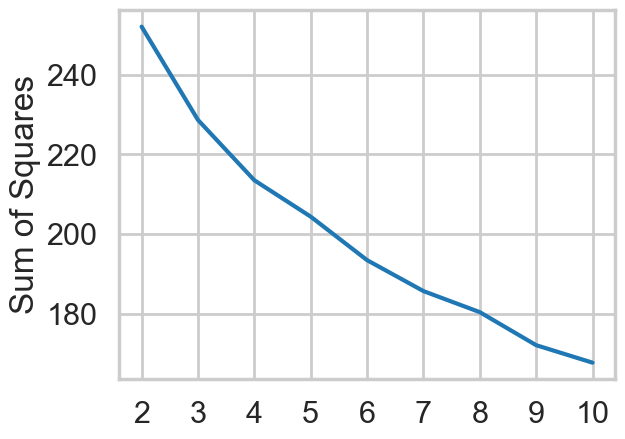

In [19]:
#plot the parameters Krange and ss
plt.plot(Krange, ss)
plt.ylabel('$K$')
plt.ylabel('Sum of Squares')
plt.xticks(np.arange(2, 11, step = 1))
plt.show()

In [20]:
#There is no definitive elbow (possibly at 7 or 3)
    #Gonna go with 3, the most definitive elbow 
        #Set 3 as best_K
best_K = 3
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
#Returns the count of values in each BIN from 0 to largest number in array ^

print(len(counts))

3


([<matplotlib.axis.XTick at 0x16d2c2750>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

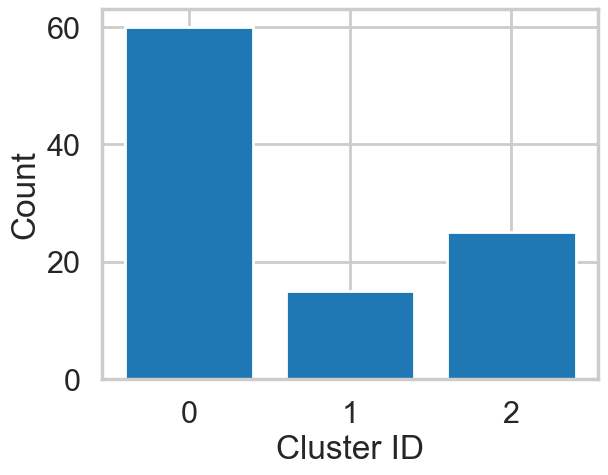

In [21]:
#Make a bar plot with the parameters range(best_K), counts
    #And align = 'center'
plt.bar(range(best_K), counts, align = 'center')
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

In [22]:
#Choosing K: The Silhouette Method.
    #Measures how well each data point fits its assigned cluster
    #AND, how poorly it fits others
    #Computed on every data point in every cluster
        #Ranges from -1 (poor) to 1 (dense), 0 = clusters overlab
        #0.71 - 1.0 = strong structure
        #0.51 - 0.7 = reasonable structure
        #0.26 - 0.5 = structure is weak
        # < 0.25 = no structure

In [23]:
#Scikit-learn function sklearn.metrics.silhouette_score
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

In [24]:
#Create an empty list called 'avg_silhouette_scores'
avg_silhouette_scores= []

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_46075/2408901150.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")
/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/mv/x5cd5k9s4xldty5dbz4rgl0c0000gn/T/ipykernel_46075/2408901150.py:45: Ma

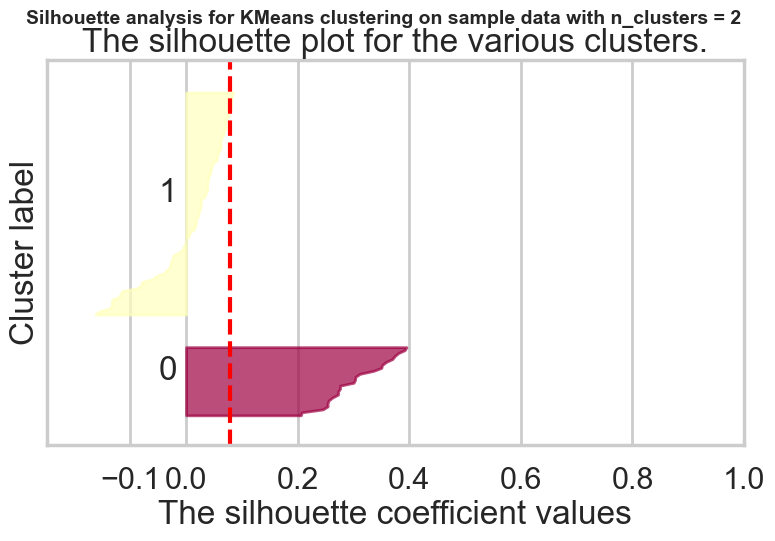

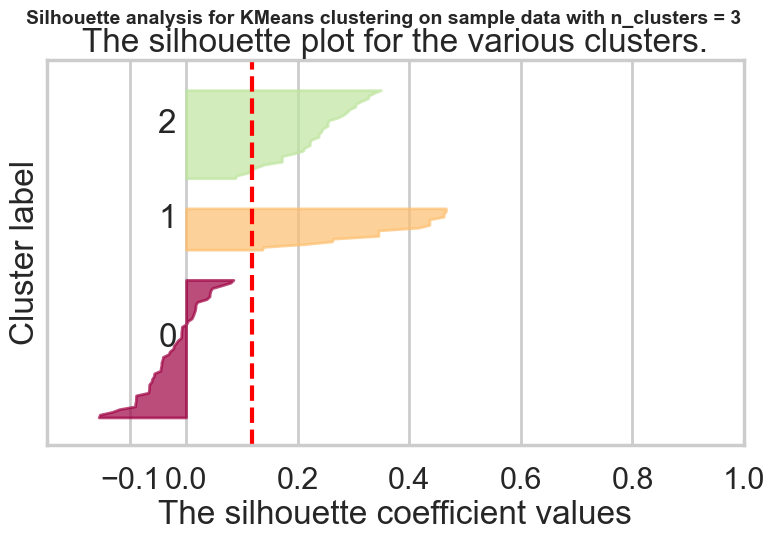

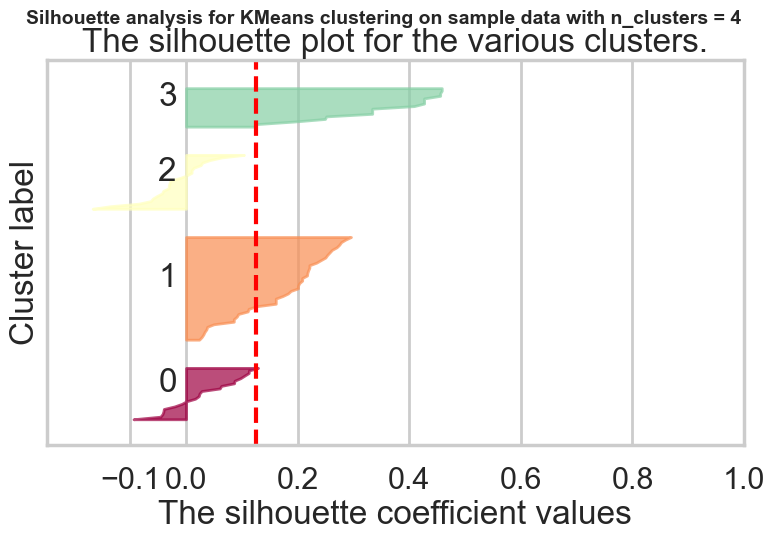

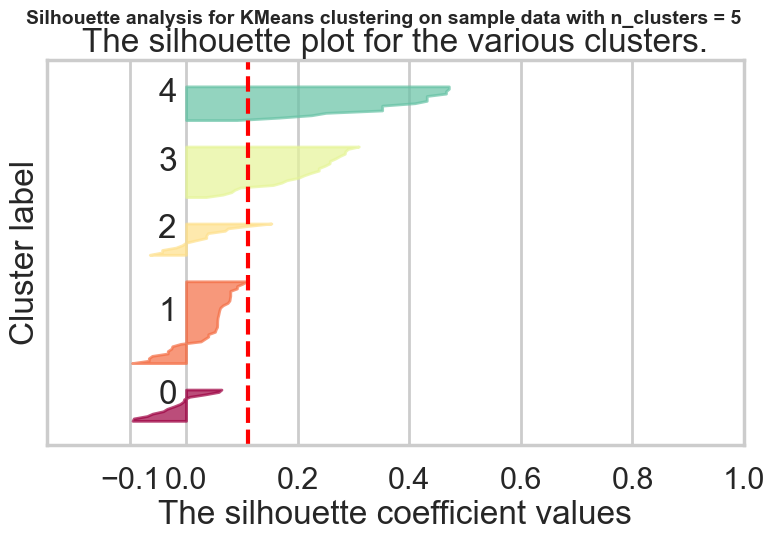

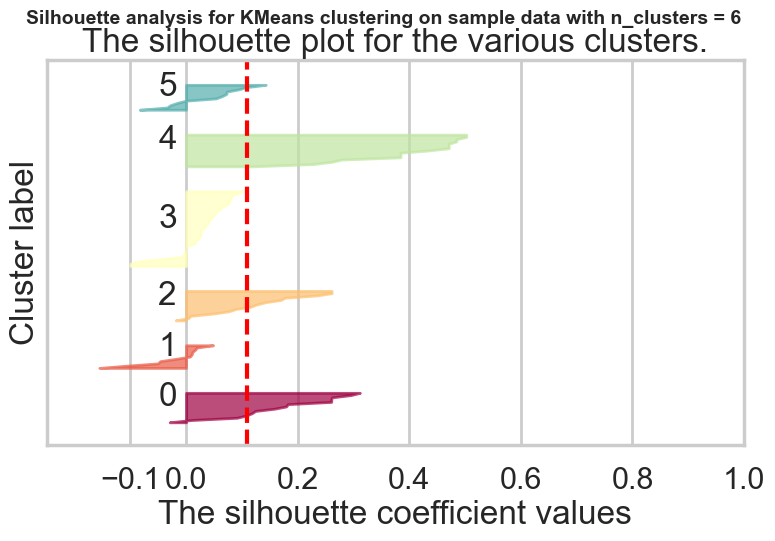

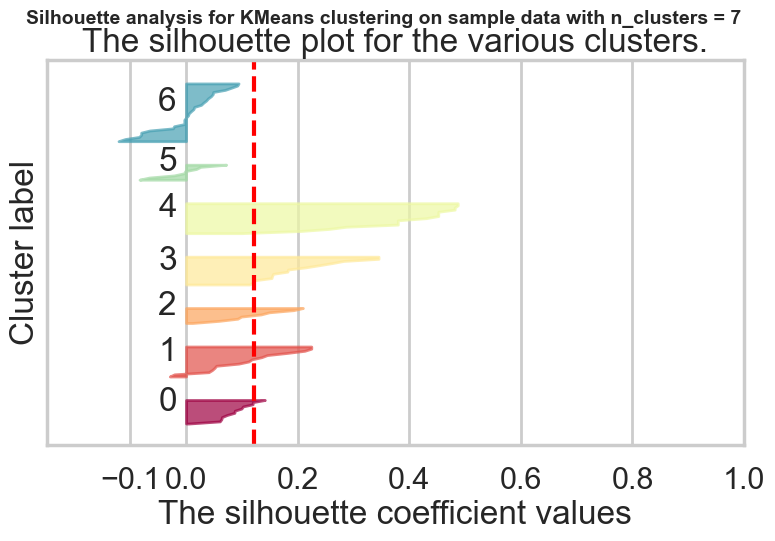

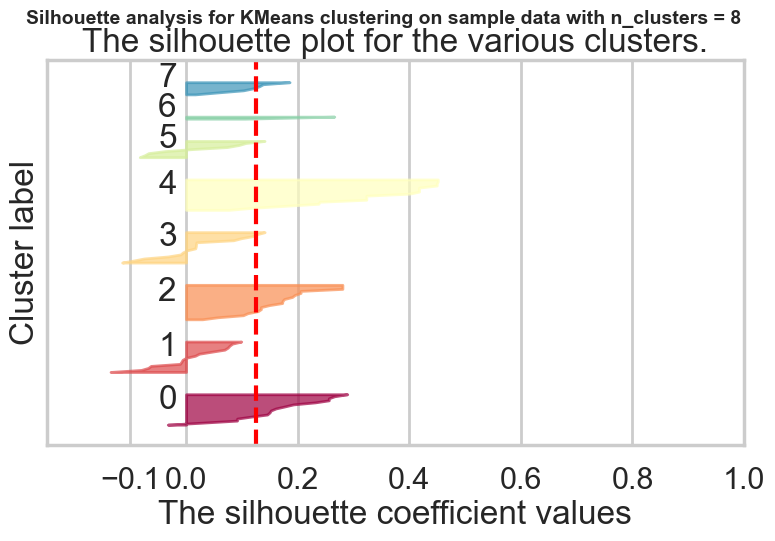

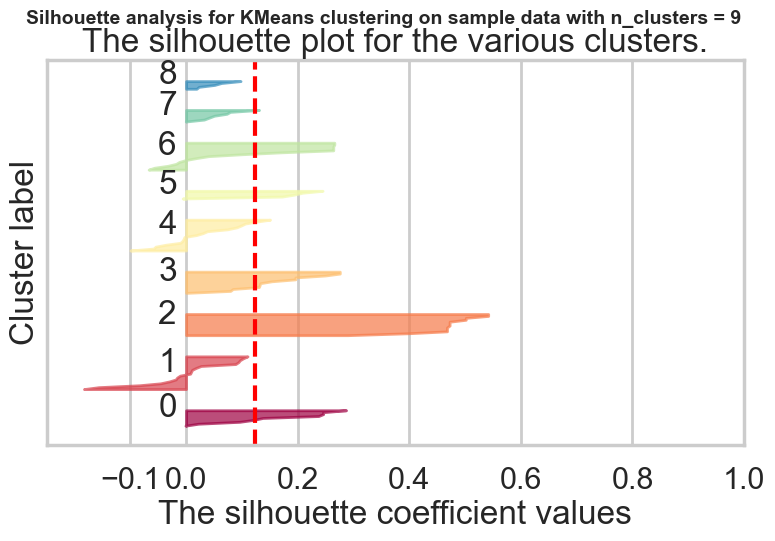

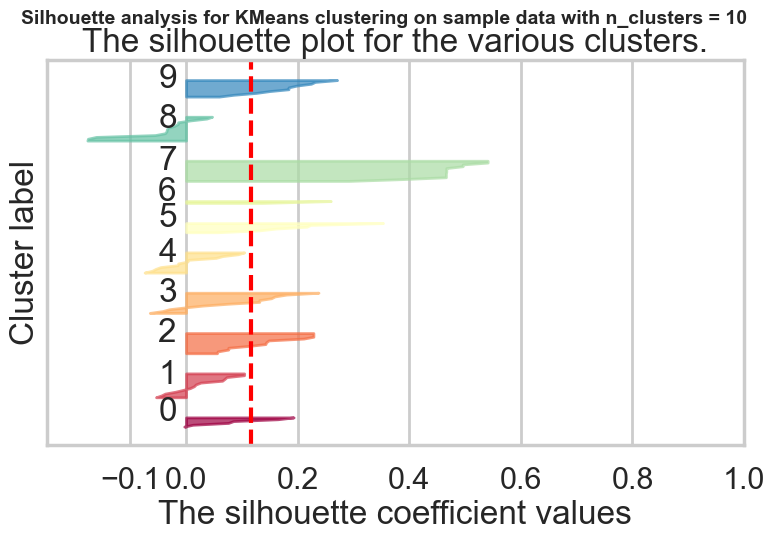

In [25]:
#Iterate through Krange with variable K (same as before)
for K in Krange:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # Call set_xlim on ax1 
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + (K + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer= sklearn.cluster.KMeans(n_clusters=K, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # Make a variable called silhouette_avg. Set the parameters to silhouette_score to X, and cluster_labels
    silhouette_avg  = sklearn.metrics.silhouette_score(x_cols, cluster_labels)
    avg_silhouette_scores.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    # Call sklearn.metrics.silhouette_samples with the below parameters
    sample_silhouette_values = sklearn.metrics.silhouette_samples(x_cols, cluster_labels)
    
    y_lower = 10
    for i in range(K):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        # Make a variable called ith_cluster_silhouette_values
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Call sort() on this variable 
        ith_cluster_silhouette_values.sort()
    
        # Call shape[0] on ith_cluster_silhouette_values 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        # This requires calling text() on ax1 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting title, xlabel and ylabel 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    # This requires axvline() 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % K),
                 fontsize=14, fontweight='bold')


In [26]:
#Solution:
#Compute the average silhouette scores for each K and plot i
#What K does the plot suggest we should choose?
#Is it different than the elbow method?

Text(0, 0.5, 'Average Silhouette Score')

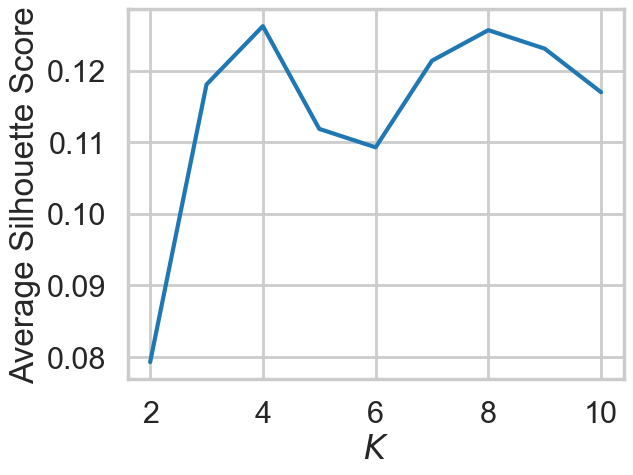

In [27]:
plt.plot(Krange, avg_silhouette_scores)
plt.xlabel('$K$')
plt.ylabel('Average Silhouette Score')

In [28]:
#What can we conclude?
    #The new best K is 4, compared to 3 that we found in elbow

In [29]:
#3b: Visualizing Clusters using PCA:

In [30]:
import sklearn.decomposition
import matplotlib.colors

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


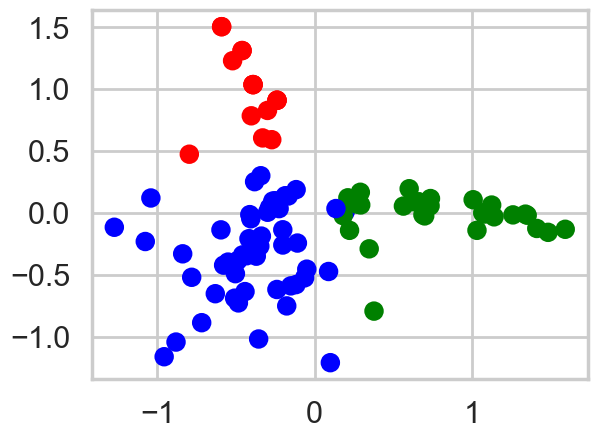

In [32]:
#Make a variable called model. We want n_clusters = 3. 
model = sklearn.cluster.KMeans(n_clusters = 3)

#Call a fit_predict() on x_cols
cluster_assignments = model.fit_predict(x_cols)

#Lets visualize with colors.ListedColormap
cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

#Do some PCA here use decomposition.PCA, and pass n_components = 2
pca = sklearn.decomposition.PCA(n_components = 2)
pc1, pc2 = zip(*pca.fit_transform(x_cols))
plt.scatter(pc1, pc2, c = cluster_assignments.tolist(), cmap = cmap)

/Users/joshthomason/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


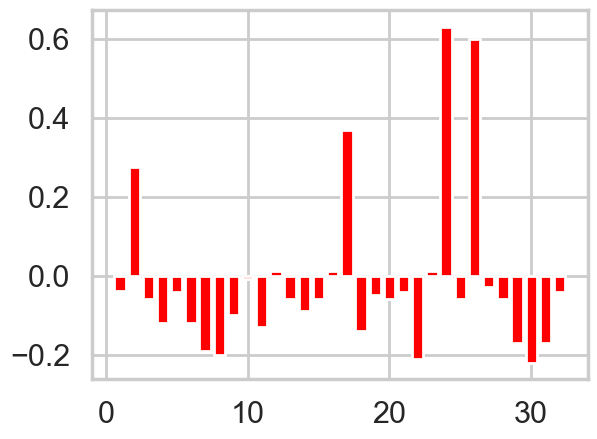

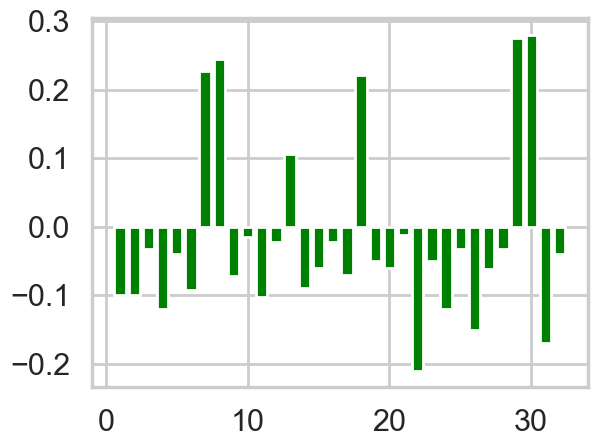

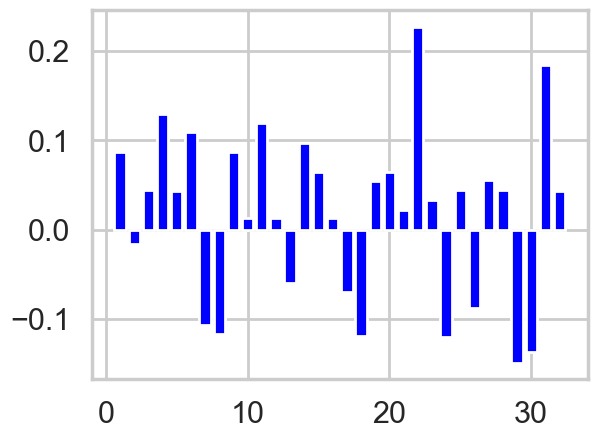

In [33]:
#Plot count of offer_id in each cluster.
#But, certain offers were used more than others in the original data.
#Let's compute the difference between how often they were used in each cluster
model = sklearn.cluster.KMeans(n_clusters = 3)
cluster_assignments = model.fit_predict(x_cols)

colors = ['red', 'green', 'blue']
offer_proportions = pivoted.sum(axis = 0) / 100 #there are 100 customers
for i in range(3):
    plt.figure(i)
    cluster = pivoted[cluster_assignments == i]
    offer_proportions_cluster = cluster.sum(axis = 0) / cluster.shape[0]
    #Number of customers in cluster ^
    lift = offer_proportions_cluster - offer_proportions
    plt.bar(range(1, 33), lift, color = colors[i])

Text(0, 0.5, 'Proportion of Variance Explained')

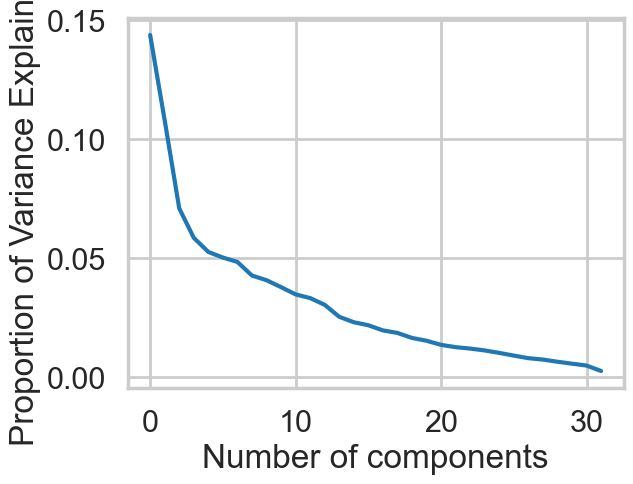

In [35]:
#Initialize a new PCA model with a default number of components
pca = sklearn.decomposition.PCA()

#Call fit on pca, with x_cols passed
pca.fit(x_cols)

#Make a variable called variance
variance = pca.explained_variance_ratio_

#Plot it
plt.plot(range(len(variance)), variance)
plt.xlabel('Number of components')
plt.ylabel('Proportion of Variance Explained')